In [193]:
import numpy as np, pandas as pd,seaborn as sns, matplotlib.pyplot as plt
sns.set_style('dark')

In [194]:
history = pd.read_excel('/content/dataviz_data (Autosaved).xlsx')

In [195]:
history['fillrate'] = history['rcvval'] / history['orderval']
history['fillrate'] = history['fillrate'].fillna(0)
history['rcvval'] = history['rcvval'].fillna(0)
history['date'] = pd.to_datetime(history['date'], dayfirst=True)
history['day_since'] = history['date'].apply(lambda x: pd.to_datetime('2020-10-22',dayfirst=True).dayofyear - x.dayofyear)
history

,date,order_no,format,division_name,orderval,rcvval,fillrate,day_since
0,2020-10-18,1,sm,Staples,9732.80,9732.80,1.0,4
1,2020-10-16,2,sm,Grocery Food,558.71,558.71,1.0,6
2,2020-10-20,3,sm,Grocery Non Food,2927.04,2927.04,1.0,2
3,2020-10-21,4,sm,Grocery Food,905.96,905.96,1.0,1
4,2020-10-27,5,sm,Grocery Food,988.62,988.62,1.0,-5
...,...,...,...,...,...,...,...,...
11901,2020-10-26,11902,hm,Grocery Non Food,458.34,0.00,0.0,-4
11902,2020-10-23,11903,hm,Grocery Food,2486.86,0.00,0.0,-1
11903,2020-10-26,11904,hm,Grocery Food,1138.34,0.00,0.0,-4
11904,2020-10-22,11905,hm,Grocery Food,124081.02,0.00,0.0,0


In [196]:
history['day_since'].describe()

count    11906.000000
mean        -0.484042
std          3.524457
min         -7.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max          9.000000
Name: day_since, dtype: float64

In [197]:
bins = [-11,-0,3,9]
labels = ['-10 to -1','0 to 2','3 to 9']
history['binned'] = pd.cut(history['day_since'], bins=bins, labels=labels, right = False)
history

,date,order_no,format,division_name,orderval,rcvval,fillrate,day_since,binned
0,2020-10-18,1,sm,Staples,9732.80,9732.80,1.0,4,3 to 9
1,2020-10-16,2,sm,Grocery Food,558.71,558.71,1.0,6,3 to 9
2,2020-10-20,3,sm,Grocery Non Food,2927.04,2927.04,1.0,2,0 to 2
3,2020-10-21,4,sm,Grocery Food,905.96,905.96,1.0,1,0 to 2
4,2020-10-27,5,sm,Grocery Food,988.62,988.62,1.0,-5,-10 to -1
...,...,...,...,...,...,...,...,...,...
11901,2020-10-26,11902,hm,Grocery Non Food,458.34,0.00,0.0,-4,-10 to -1
11902,2020-10-23,11903,hm,Grocery Food,2486.86,0.00,0.0,-1,-10 to -1
11903,2020-10-26,11904,hm,Grocery Food,1138.34,0.00,0.0,-4,-10 to -1
11904,2020-10-22,11905,hm,Grocery Food,124081.02,0.00,0.0,0,0 to 2


In [198]:
pd.cut(history['day_since'], bins=bins).dtype
# () = include 
# [] = exclude

CategoricalDtype(categories=[(-11, 0], (0, 3], (3, 9]],
              ordered=True)

In [199]:
l = list(history.columns)
l[-1] = 'day bucket'
history.columns = l
history

,date,order_no,format,division_name,orderval,rcvval,fillrate,day_since,day bucket
0,2020-10-18,1,sm,Staples,9732.80,9732.80,1.0,4,3 to 9
1,2020-10-16,2,sm,Grocery Food,558.71,558.71,1.0,6,3 to 9
2,2020-10-20,3,sm,Grocery Non Food,2927.04,2927.04,1.0,2,0 to 2
3,2020-10-21,4,sm,Grocery Food,905.96,905.96,1.0,1,0 to 2
4,2020-10-27,5,sm,Grocery Food,988.62,988.62,1.0,-5,-10 to -1
...,...,...,...,...,...,...,...,...,...
11901,2020-10-26,11902,hm,Grocery Non Food,458.34,0.00,0.0,-4,-10 to -1
11902,2020-10-23,11903,hm,Grocery Food,2486.86,0.00,0.0,-1,-10 to -1
11903,2020-10-26,11904,hm,Grocery Food,1138.34,0.00,0.0,-4,-10 to -1
11904,2020-10-22,11905,hm,Grocery Food,124081.02,0.00,0.0,0,0 to 2


In [200]:
history

,date,order_no,format,division_name,orderval,rcvval,fillrate,day_since,day bucket
0,2020-10-18,1,sm,Staples,9732.80,9732.80,1.0,4,3 to 9
1,2020-10-16,2,sm,Grocery Food,558.71,558.71,1.0,6,3 to 9
2,2020-10-20,3,sm,Grocery Non Food,2927.04,2927.04,1.0,2,0 to 2
3,2020-10-21,4,sm,Grocery Food,905.96,905.96,1.0,1,0 to 2
4,2020-10-27,5,sm,Grocery Food,988.62,988.62,1.0,-5,-10 to -1
...,...,...,...,...,...,...,...,...,...
11901,2020-10-26,11902,hm,Grocery Non Food,458.34,0.00,0.0,-4,-10 to -1
11902,2020-10-23,11903,hm,Grocery Food,2486.86,0.00,0.0,-1,-10 to -1
11903,2020-10-26,11904,hm,Grocery Food,1138.34,0.00,0.0,-4,-10 to -1
11904,2020-10-22,11905,hm,Grocery Food,124081.02,0.00,0.0,0,0 to 2


In [201]:
A = history.groupby('date').sum()
B = history.groupby('date').mean()
A

,order_no,orderval,rcvval,fillrate,day_since
date,,,,,
2020-10-13,684459,0.00,0.00,0.000000,783
2020-10-14,1007772,0.00,0.00,0.000000,1024
2020-10-15,1034197,836592.56,491645.07,24.720592,1043
2020-10-16,1512590,914995.55,671182.90,187.103659,1998
2020-10-17,875848,1053441.22,994702.95,167.771708,1210
2020-10-18,3035742,711936.01,658973.45,90.878281,1852
2020-10-19,3694347,2630674.59,2574614.09,416.373732,2358
2020-10-20,6420221,5272997.84,5189664.87,909.164219,3032
2020-10-21,5226625,4810572.78,4719685.84,781.135558,1266


In [202]:
A = A.reset_index()
B = B.reset_index()
A

,date,order_no,orderval,rcvval,fillrate,day_since
0,2020-10-13,684459,0.00,0.00,0.000000,783
1,2020-10-14,1007772,0.00,0.00,0.000000,1024
2,2020-10-15,1034197,836592.56,491645.07,24.720592,1043
3,2020-10-16,1512590,914995.55,671182.90,187.103659,1998
4,2020-10-17,875848,1053441.22,994702.95,167.771708,1210
5,2020-10-18,3035742,711936.01,658973.45,90.878281,1852
6,2020-10-19,3694347,2630674.59,2574614.09,416.373732,2358
7,2020-10-20,6420221,5272997.84,5189664.87,909.164219,3032
8,2020-10-21,5226625,4810572.78,4719685.84,781.135558,1266
9,2020-10-22,5378283,6454717.56,1897727.33,421.484727,0


In [216]:
rep = history.pivot_table(index=['format','division_name'], columns= ['day bucket'], values= ['orderval',	'rcvval',	'fillrate'], aggfunc='sum' )
#rep.style.set_caption('Monthly Report')
rep = rep.round(decimals=2)
rep

fillrate           ...      rcvval            
day bucket              -10 to -1   0 to 2  ...      0 to 2      3 to 9
format division_name                        ...                        
hm     Grocery Food          5.00     9.00  ...    77084.97    60160.47
       Grocery Non Food      1.00     3.00  ...    19782.91        0.00
       Staples               0.00     0.00  ...        0.00        0.00
sm     Grocery Food        398.19  1260.76  ...  5496088.51  2078327.20
       Grocery Non Food    333.27   748.95  ...  4142790.37   889444.77
       Staples               2.00    90.07  ...  2071331.28  2363186.02

[6 rows x 9 columns]

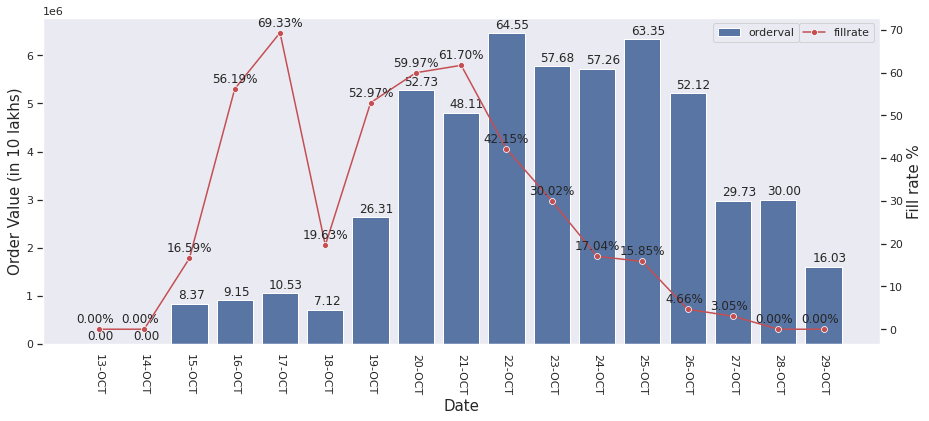

In [205]:
x = A.index
month =['JAN', 'FEB','MAR','APR','MAY','JUN', 'JUL','AUG','SEP', 'OCT', 'NOV', 'DEC']
plt.figure(figsize=(15,6))
xlabels = A['date'].apply(lambda x: str(x.date().day) + '-'+ month[x.date().month-1])
sns.barplot(data=A, x = x, y = 'orderval', color="b", label='orderval')
for i,j in zip(x, A['orderval']):
  plt.text(i-0.25,j+100000, s= '{:.2F}'.format(j/100000))
#plt.style.use("dark_background")
#plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = -90)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Order Value (in 10 lakhs)', fontsize=15)
plt.legend( bbox_to_anchor=(0.91,1))
ax2 = plt.twinx()
sns.lineplot(data=B['fillrate']*100, color="r", ax=ax2, marker="o",  label='fillrate')
for i,j in zip(x, B['fillrate']*100):
  plt.text(i-0.5,j+1.5, s= '{:.2F}%'.format(j))
plt.ylabel('Fill rate %', fontsize=15)
ax2.set_xticklabels(xlabels) ;
plt.legend();
